In [1]:
install.packages("BiocManager")
library(BiocManager)
BiocManager::install("DESeq2")
library("DESeq2")  #This is the import for python

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.9 (BiocManager 1.30.8), R 3.6.1 (2019-07-05)
Installing package(s) 'BiocVersion', 'DESeq2'
also installing the dependencies ‘ellipsis’, ‘rlang’, ‘zeallot’, ‘bit’, ‘vctrs’, ‘bitops’, ‘bit64’, ‘blob’, ‘memoise’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘XML’, ‘checkmate’, ‘GenomeInfoDb’, ‘XVector’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘AnnotationDbi’, ‘annotate’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘Hmisc’, ‘RcppArmadillo’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'askpass', 'backports', 'boot', 'callr', 'caret', 'clipr',
  'cluster', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',


In [3]:
install.packages("BiocManager")
library(BiocManager)
BiocManager::install("edgeR")
library("edgeR")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version 3.9 (BiocManager 1.30.8), R 3.6.1 (2019-07-05)
Installing package(s) 'edgeR'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'askpass', 'backports', 'boot', 'callr', 'caret', 'clipr',
  'cluster', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr', 'evaluate',
  'foreach', 'foreign', 'formatR', 'fs', 'ggplot2', 'glmnet', 'gower', 'haven',
  'hexbin', 'hms', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'ipred',
  'IRkernel', 'iterators', 'KernSmooth', 'knitr', 'later', 'lava', 'markdown',
  'MASS', 'mgcv', 'mime', 'modelr', 'nlme', 'numDeriv', 'openssl', 'pillar',
  'pkgconfig', 'processx', 'progress', 'promises', 'purrr', 'quantmod', 'Rcpp',
  'recipes', 'repr', 'reprex', 'rmarkdown', 'rvest', 'shiny', 'sys', 'tibble',
  'tidyr', 'tinytex', 'TTR', 'whisker', 'xfun', 'xml2'
Loading required package: limma


In [1]:
library(BiocManager)

In [2]:
library('edgeR')

Loading required package: limma


In [22]:
dir()

[1] "12859_2016_Article_1457.pdf"           
 [2] "document.pdf"                          
 [3] "Exploratory data analysis (copy).ipynb"
 [4] "Exploratory data analysis.ipynb"       
 [5] "Intro2RNAseq copy.pdf"                 
 [6] "Intro2RNAseq.pdf"                      
 [7] "project description.docx"              
 [8] "R.ipynb"                               
 [9] "raw_countst.tsv"                       
[10] "raw_countstdl.sec"                     
[11] "raw_countstdl.sec copy"                
[12] "RNA-Seq_project.pdf"                   
[13] "Supplementary-RNAseq-practical.pdf"

In [78]:
getwd()
x <- read.delim("raw_countst.sec",row.names=1,stringsAsFactors=FALSE)
head(x)

[1] "/home/dimitri/ownCloud/Lectures/Programming for Life Sciences/EukaryoticTranscriptomics"

,ctl1,ctl2,ctl3,ctl4,trt1,trt2,trt3,trt4
ENSMUSG00000102693,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,1,0,0,0
ENSMUSG00000051951,2,0,1,1,11,2,1,24
ENSMUSG00000102851,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0


In [88]:
y <- DGEList(counts=x,group=Treat)

In [89]:
keep <- filterByExpr(y)
z <- y[keep, , keep.lib.sizes=FALSE]

In [90]:
z <- calcNormFactors(z)

In [91]:
# how to name group as ctl and treat
z$samples

,group,lib.size,norm.factors
ctl1,ctl,41354826,0.9529242
ctl2,ctl,34584886,0.9774164
ctl3,ctl,35459391,1.0160967
ctl4,ctl,37095889,0.9948952
trt1,trt,39989405,1.0310074
trt2,trt,36877683,0.9849949
trt3,trt,40271257,1.0715532
trt4,trt,173486417,0.9759783


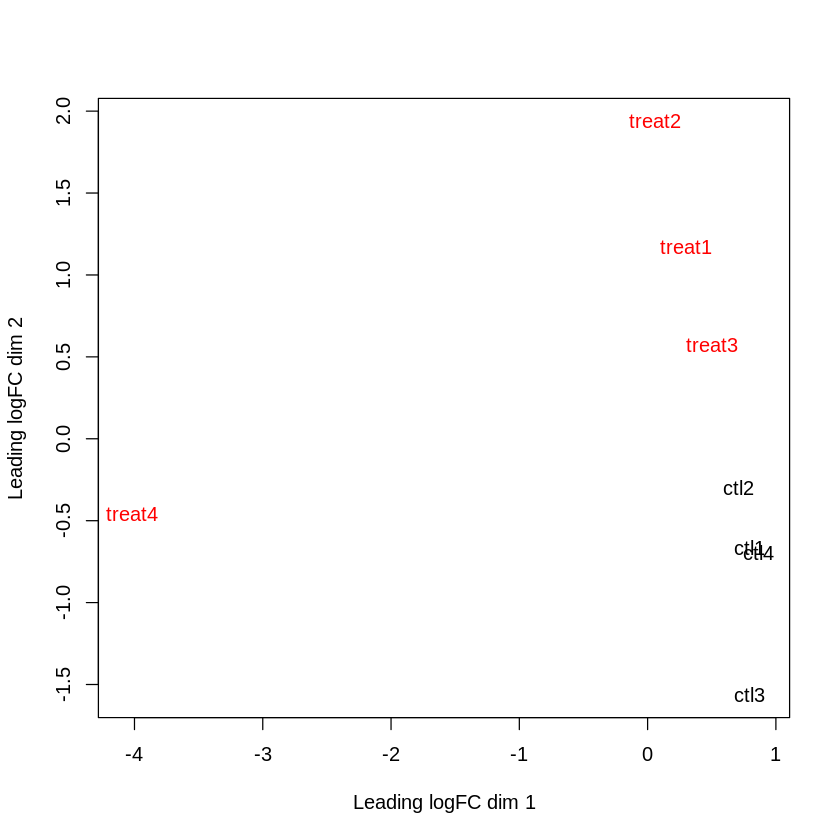

In [17]:
plotMDS(z,col=rep(1:2, each=4))

In [73]:
head(x)

,ctl1,ctl2,ctl3,ctl4,treat1,treat2,treat3,treat4
ENSMUSG00000102693,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,1,0,0,0
ENSMUSG00000051951,2,0,1,1,11,2,1,24
ENSMUSG00000102851,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0


In [86]:

Treat <- factor(substring(colnames(x),1,3))
Treat <- relevel(Treat, ref='ctl')
Time <- factor(substring(colnames(x),4,4))

In [87]:
Treat

[1] ctl ctl ctl ctl trt trt trt trt
Levels: ctl trt

In [63]:
Treat = c("ctl", "ctl","ctl","ctl", "treat", "treat", "treat","treat")

In [64]:
Treat

[1] "ctl"   "ctl"   "ctl"   "ctl"   "treat" "treat" "treat" "treat"

In [66]:
Treat <- relevel(Treat, ref='ctl')

ERROR: Error in relevel.default(Treat, ref = "ctl"): 'relevel' only for (unordered) factors


In [69]:
Time <- c("1", "2","3","4", "1", "2", "3","4")

In [92]:
Time

[1] 1 2 3 4 1 2 3 4
Levels: 1 2 3 4

In [94]:
design <- model.matrix(~Time+Time:Treat) #Tilde no minus!! Tilde takes a specific column

In [100]:
design

(Intercept),Time2,Time3,Time4,Time1:Treattrt,Time2:Treattrt,Time3:Treattrt,Time4:Treattrt
1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1


In [99]:
logFC <- predFC(z,design,prior.count=1,dispersion=0.05)

In [98]:
cor(logFC[,5:8])

,Time1:Treattrt,Time2:Treattrt,Time3:Treattrt,Time4:Treattrt
Time1:Treattrt,1.0000000,0.2597664,0.6361607,0.3100181
Time2:Treattrt,0.2597664,1.0000000,0.4250039,0.3036842
Time3:Treattrt,0.6361607,0.4250039,1.0000000,0.3270622
Time4:Treattrt,0.3100181,0.3036842,0.3270622,1.0000000


In [97]:
logFC

,(Intercept),Time2,Time3,Time4,Time1:Treattrt,Time2:Treattrt,Time3:Treattrt,Time4:Treattrt
ENSMUSG00000033845,-15.05242,-0.03549937,-0.19438317,-0.24468158,-0.09785309,0.30738823,-0.17100745,0.51846590
ENSMUSG00000102275,-20.93019,0.59870900,0.19631848,0.09125317,0.75222288,-0.41374446,-0.39706890,-2.02989249
ENSMUSG00000025903,-15.51307,-1.14614285,-0.22186479,-0.37240005,-0.22232076,1.03395951,-0.35937555,1.31643960
ENSMUSG00000033813,-15.35743,-0.13436407,-0.05936527,0.05717622,-0.58933846,-0.39944218,-0.96090669,-1.16215825
ENSMUSG00000103280,-21.56264,-0.72120892,-1.03904392,-0.63420404,0.95232069,2.86056802,1.81110825,3.13829310
ENSMUSG00000002459,-19.92009,0.35632500,0.26565630,0.19810191,0.84704261,2.61256087,1.20785833,2.29837023
ENSMUSG00000033793,-14.08115,0.36141340,-0.21286574,0.04093353,0.85770107,0.61990040,0.69957170,-0.75117456
ENSMUSG00000025907,-13.07504,-0.47231114,-0.46653396,-0.45330080,0.70875003,1.02366340,0.63595281,-2.60524944
ENSMUSG00000090031,-18.59213,-0.23625412,0.05412794,-0.07475157,1.46867319,1.13741811,0.72034045,2.26769684
ENSMUSG00000087247,-18.25788,-0.95526829,-3.43056966,-1.02956719,1.19795365,4.02896265,3.32315002,2.67261654
